# Crypto API Pull


In [56]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os
from time import time
from time import sleep
import pandas as pd

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '9f8d7085-1269-4a80-87cb-f2bd3497028d',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-08-24T14:47:30.810Z', 'error_code': 0, 'error_message': None, 'elapsed': 64, 'credit_count': 1, 'notice': None, 'total_count': 9634}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9695, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [57]:
type(data)

dict

In [58]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [59]:
df = pd.json_normalize(data['data'])
df['Timestamp'] = pd.Timestamp.now()
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,9695,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19130718.00000,19130718.00000,NaN,1,NaN,NaN,None,2022-08-24T14:46:00.000Z,21467.91094,31211395146.56548,-4.67780,0.00205,-0.38769,-8.21537,-1.73373,1.58758,-26.55908,410696550296.71265,39.76280,450826129799.78003,None,2022-08-24T14:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-24 09:45:42.324666
1,1027,Ethereum,ETH,ethereum,6034,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,122093401.93650,122093401.93650,NaN,2,NaN,NaN,None,2022-08-24T14:46:00.000Z,1648.13637,17171097069.16926,-5.76860,-0.29533,0.33992,-9.72472,8.40693,37.85646,-10.79451,201226576024.29568,19.47390,201226576024.29999,None,2022-08-24T14:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-24 09:45:42.324666
2,825,Tether,USDT,tether,38792,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,67549555015.62651,69157777033.00569,NaN,3,NaN,NaN,None,2022-08-24T14:46:00.000Z,1.00008,48010967870.17592,-9.37580,0.00008,0.01030,-0.00164,0.00303,0.05531,0.10728,67554650341.80844,6.54780,69162993668.88000,None,2022-08-24T14:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-24 09:45:42.324666
3,3408,USD Coin,USDC,usd-coin,5938,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,52335169963.86270,52335169963.86270,NaN,4,NaN,NaN,None,2022-08-24T14:46:00.000Z,0.99994,6857826443.68374,25.91670,-0.01218,-0.01178,0.01800,0.01159,-0.00245,-0.03491,52332112684.64462,5.06670,52332112684.64000,None,2022-08-24T14:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-24 09:45:42.324666
4,1839,BNB,BNB,bnb,1085,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-08-24T14:46:00.000Z,295.90746,928347258.95793,-22.96760,-0.18926,-1.03354,-3.51815,16.00791,26.41154,-5.12871,47740899887.17407,4.63000,59181492935.53000,None,2022-08-24T14:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-24 09:45:42.324666
5,4687,Binance USD,BUSD,binance-usd,4857,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,19042964797.50925,19042964797.50925,NaN,6,NaN,NaN,None,2022-08-24T14:46:00.000Z,1.00003,4664670168.47391,-5.49850,0.01086,-0.02735,0.00146,-0.10771,-0.12518,-0.04668,19043534174.30015,1.84450,19043534174.30000,None,2022-08-24T14:46:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-08-24 09:45:42.324666
6,52,XRP,XRP,xrp,803,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,49537223666.00000,99989330486.00000,NaN,7,NaN,NaN,None,2022-08-24T14:46:00.000Z,0.34317,881904555.73073,-8.19770,-0.24818,0.02231,-7.48010,-0.37942,-4.87014,-12.67618,16999615964.94527,1.64520,34316852473.53000,None,2022-08-24T14:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-24 09:45:42.324666
7,2010,Cardano,ADA,cardano,558,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33739028515.75500,34277702081.60500,NaN,8,NaN,NaN,None,2022-08-24T14:46:00.000Z,0.45929,490829827.45936,-20.02870,-0.12190,-1.08630,-13.98363,-6.32962,-5.42563,-6.05047,15496002987.95023,1.50280,20668056109.92000,None,2022-08-24T14:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-0

In [60]:
def api_run():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
        }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '9f8d7085-1269-4a80-87cb-f2bd3497028d',
        }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'../a/API.csv'):
        df.to_csv(r'../a/API.csv', header='column_names')
    else:
        df.to_csv(r'../a/API.csv', mode = 'a', header=False)

In [61]:

for i in range(10):
    api_run()
    print('API pulled successfully.')
    sleep(15)

{'status': {'timestamp': '2022-08-24T14:47:31.307Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9634}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9695, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

c:\Users\wsolomon\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-08-24T14:47:46.571Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9634}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9695, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

c:\Users\wsolomon\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-08-24T14:48:01.794Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 9634}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9695, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

c:\Users\wsolomon\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-08-24T14:48:16.979Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 9634}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9695, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

c:\Users\wsolomon\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-08-24T14:48:32.199Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 9634}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9695, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

c:\Users\wsolomon\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-08-24T14:48:47.344Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 9634}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9695, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

c:\Users\wsolomon\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-08-24T14:49:02.516Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9634}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9695, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

c:\Users\wsolomon\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-08-24T14:49:17.831Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 9634}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9695, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

c:\Users\wsolomon\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-08-24T14:49:33.027Z', 'error_code': 0, 'error_message': None, 'elapsed': 59, 'credit_count': 1, 'notice': None, 'total_count': 9634}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9695, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

c:\Users\wsolomon\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-08-24T14:49:48.221Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 9634}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9695, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

c:\Users\wsolomon\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [62]:
dfAPI = pd.read_csv('../a/API.csv')
dfAPI

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,9694,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19129931.00000,19129931.00000,NaN,1,NaN,NaN,NaN,2022-08-23T20:15:00.000Z,21553.18921,32105050045.97294,0.64830,0.03834,2.15774,-10.04625,-5.11955,1.39584,-27.26925,412311022350.11328,39.87940,452616973336.31000,NaN,2022-08-23T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-23 20:15:10.520656
1,1,1027,Ethereum,ETH,ethereum,6032,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,122083558.74900,122083558.74900,NaN,2,NaN,NaN,NaN,2022-08-23T20:15:00.000Z,1655.63548,18552987366.51059,-3.11160,-0.12409,5.03663,-12.01320,3.30276,34.22998,-15.32689,202125871616.18484,19.54790,202125871616.17999,NaN,2022-08-23T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-23 20:15:10.520656
2,2,825,Tether,USDT,tether,38741,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,67549555015.74651,69157777033.00569,NaN,3,NaN,NaN,NaN,2022-08-23T20:15:00.000Z,0.99998,52978066914.24211,1.47070,-0.00131,0.00294,-0.01109,-0.00267,0.05929,0.10783,67547974007.72662,6.53190,69156158384.30000,NaN,2022-08-23T20:15:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-23 20:15:10.520656
3,3,3408,USD Coin,USDC,usd-coin,5921,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,52289972106.56112,52289972106.56112,NaN,4,NaN,NaN,NaN,2022-08-23T20:15:00.000Z,1.00013,5446317940.49267,0.00000,0.01416,0.00892,0.00818,-0.00727,0.00021,0.03076,52296598364.76432,5.05820,52296598364.76000,NaN,2022-08-23T20:15:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-23 20:15:10.520656
4,4,1839,BNB,BNB,bnb,1085,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-08-23T20:15:00.000Z,298.77719,1093365655.55386,-27.19080,-0.02413,0.25523,-5.41865,13.94405,24.71689,-8.45650,48203894105.64060,4.66140,59755438737.43000,NaN,2022-08-23T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-23 20:15:10.520656
5,5,4687,Binance USD,BUSD,binance-usd,4848,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,19028354497.25925,19028354497.25925,NaN,6,NaN,NaN,NaN,2022-08-23T20:15:00.000Z,1.00018,4822409327.10349,-4.48800,0.01629,-0.00879,0.01766,-0.06161,-0.01647,0.08907,19031743094.12685,1.84040,19031743094.13000,NaN,2022-08-23T20:15:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-08-23 20:15:10.520656
6,6,52,XRP,XRP,xrp,803,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,49537223666.00000,99989330486.00000,NaN,7,NaN,NaN,NaN,2022-08-23T20:15:00.000Z,0.34611,944588466.19723,-3.09840,0.17454,2.64688,-7.75326,-4.36898,-5.26102,-14.55698,17145269454.27879,1.65810,34610880839.59000,NaN,2022-08-23T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-23 20:15:10.520656
7,7,2010,Cardano,ADA,cardano,558,2017-10-01T00:00:00.000Z,"['mineable', 'dpos', 'pos', 'platform', 'resea...",45000000000.00000,33752565071.28800,34277702081.60500,NaN,8,NaN,NaN,NaN,2022-08-23T20:15:00.000Z,0.46277,570194831.44956,-22.95750,0.31833,2.12935,-17.67030,-10.55528,-8.47856,-10.05652,15619726371.23561,1.51060,20824719105.68000,NaN,2022-08-23T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,

In [63]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [64]:
dfAPI

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,9694,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19129931.00000,19129931.00000,NaN,1,NaN,NaN,NaN,2022-08-23T20:15:00.000Z,21553.18921,32105050045.97294,0.64830,0.03834,2.15774,-10.04625,-5.11955,1.39584,-27.26925,412311022350.11328,39.87940,452616973336.31000,NaN,2022-08-23T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-23 20:15:10.520656
1,1,1027,Ethereum,ETH,ethereum,6032,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,122083558.74900,122083558.74900,NaN,2,NaN,NaN,NaN,2022-08-23T20:15:00.000Z,1655.63548,18552987366.51059,-3.11160,-0.12409,5.03663,-12.01320,3.30276,34.22998,-15.32689,202125871616.18484,19.54790,202125871616.17999,NaN,2022-08-23T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-23 20:15:10.520656
2,2,825,Tether,USDT,tether,38741,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,67549555015.74651,69157777033.00569,NaN,3,NaN,NaN,NaN,2022-08-23T20:15:00.000Z,0.99998,52978066914.24211,1.47070,-0.00131,0.00294,-0.01109,-0.00267,0.05929,0.10783,67547974007.72662,6.53190,69156158384.30000,NaN,2022-08-23T20:15:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-23 20:15:10.520656
3,3,3408,USD Coin,USDC,usd-coin,5921,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,52289972106.56112,52289972106.56112,NaN,4,NaN,NaN,NaN,2022-08-23T20:15:00.000Z,1.00013,5446317940.49267,0.00000,0.01416,0.00892,0.00818,-0.00727,0.00021,0.03076,52296598364.76432,5.05820,52296598364.76000,NaN,2022-08-23T20:15:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-23 20:15:10.520656
4,4,1839,BNB,BNB,bnb,1085,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-08-23T20:15:00.000Z,298.77719,1093365655.55386,-27.19080,-0.02413,0.25523,-5.41865,13.94405,24.71689,-8.45650,48203894105.64060,4.66140,59755438737.43000,NaN,2022-08-23T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-23 20:15:10.520656
5,5,4687,Binance USD,BUSD,binance-usd,4848,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,19028354497.25925,19028354497.25925,NaN,6,NaN,NaN,NaN,2022-08-23T20:15:00.000Z,1.00018,4822409327.10349,-4.48800,0.01629,-0.00879,0.01766,-0.06161,-0.01647,0.08907,19031743094.12685,1.84040,19031743094.13000,NaN,2022-08-23T20:15:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-08-23 20:15:10.520656
6,6,52,XRP,XRP,xrp,803,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,49537223666.00000,99989330486.00000,NaN,7,NaN,NaN,NaN,2022-08-23T20:15:00.000Z,0.34611,944588466.19723,-3.09840,0.17454,2.64688,-7.75326,-4.36898,-5.26102,-14.55698,17145269454.27879,1.65810,34610880839.59000,NaN,2022-08-23T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-23 20:15:10.520656
7,7,2010,Cardano,ADA,cardano,558,2017-10-01T00:00:00.000Z,"['mineable', 'dpos', 'pos', 'platform', 'resea...",45000000000.00000,33752565071.28800,34277702081.60500,NaN,8,NaN,NaN,NaN,2022-08-23T20:15:00.000Z,0.46277,570194831.44956,-22.95750,0.31833,2.12935,-17.67030,-10.55528,-8.47856,-10.05652,15619726371.23561,1.51060,20824719105.68000,NaN,2022-08-23T20:15:00.000Z,NaN,NaN,NaN,NaN,NaN,

In [65]:
dfAPI2 = dfAPI.groupby('name',sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [66]:
dfAPI2 = dfAPI2.stack()

In [67]:
dfAPI2

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.03564
             quote.USD.percent_change_24h     1.20072
             quote.USD.percent_change_7d     -9.52921
             quote.USD.percent_change_30d    -4.07391
             quote.USD.percent_change_60d     1.41309
             quote.USD.percent_change_90d   -27.18779
Ethereum     quote.USD.percent_change_1h     -0.17825
             quote.USD.percent_change_24h     3.36145
             quote.USD.percent_change_7d    -11.37865
             quote.USD.percent_change_30d     4.75741
             quote.USD.percent_change_60d    35.76366
             quote.USD.percent_change_90d   -13.95059
Tether       quote.USD.percent_change_1h      0.00027
             quote.USD.percent_change_24h     0.00672
             quote.USD.percent_change_7d     -0.00685
             quote.USD.percent_change_30d    -0.00209
             quote.USD.percent_change_60d     0.05912
             quote.USD.percent_change_90

In [68]:
dfAPI2 = dfAPI2.to_frame(name='values')

In [69]:
dfAPI2 = dfAPI2.reset_index()

In [70]:
dfAPI2 = dfAPI2.rename(columns={'level_1':'percent_change'})
dfAPI2

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.03564
1,Bitcoin,quote.USD.percent_change_24h,1.20072
2,Bitcoin,quote.USD.percent_change_7d,-9.52921
3,Bitcoin,quote.USD.percent_change_30d,-4.07391
4,Bitcoin,quote.USD.percent_change_60d,1.41309
5,Bitcoin,quote.USD.percent_change_90d,-27.18779
6,Ethereum,quote.USD.percent_change_1h,-0.17825
7,Ethereum,quote.USD.percent_change_24h,3.36145
8,Ethereum,quote.USD.percent_change_7d,-11.37865
9,Ethereum,quote.USD.percent_change_30d,4.75741


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt


In [72]:
dfAPI2['percent_change'] = dfAPI2['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

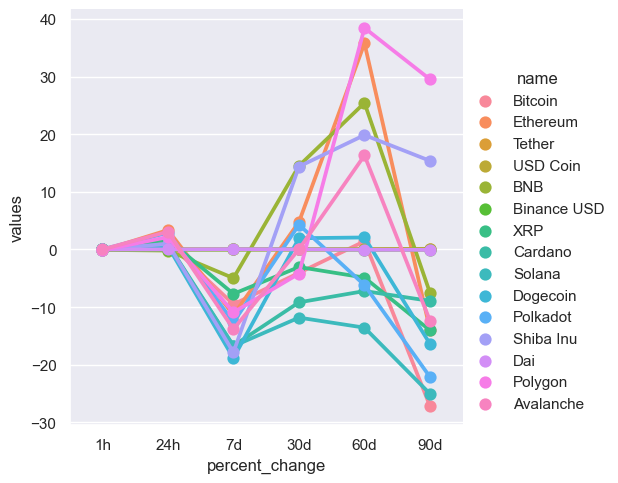

In [73]:
sns.catplot(data = dfAPI2, x = 'percent_change', y = 'values', hue ='name', kind = 'point')

In [90]:
df2 = dfAPI[['name','quote.USD.price','Timestamp']]
df2 = df2.query("name == 'Bitcoin'")
df2

,name,quote.USD.price,Timestamp
0,Bitcoin,21553.18921,2022-08-23 20:15:10.520656
15,Bitcoin,21553.18921,2022-08-23 20:15:25.778452
30,Bitcoin,21553.18921,2022-08-23 20:15:41.036046
45,Bitcoin,21553.18921,2022-08-23 20:15:56.354748
60,Bitcoin,21558.73300,2022-08-23 20:16:12.115814
75,Bitcoin,21558.73300,2022-08-23 20:16:27.361989
90,Bitcoin,21558.73300,2022-08-23 20:16:46.838716
105,Bitcoin,21558.73300,2022-08-23 20:17:02.124181
120,Bitcoin,21554.54898,2022-08-23 20:17:17.521254
135,Bitcoin,21554.54898,2022-08-23 20:17:32.802466


In [91]:
df2['Timestamp'] = df2['Timestamp'].replace(['2022-08-23 20:15:10.520656','2022-08-23 20:15:25.778452','2022-08-23 20:15:41.036046','2022-08-23 20:15:56.354748','2022-08-23 20:16:12.115814','2022-08-23 20:16:27.361989','2022-08-23 20:16:46.838716','2022-08-23 20:17:02.124181','2022-08-23 20:17:17.521254','2022-08-23 20:17:32.802466','2022-08-23 21:06:51.110433','2022-08-23 21:07:06.371781','2022-08-23 21:07:21.634029','2022-08-23 21:07:37.086456','2022-08-23 21:07:52.287349','2022-08-23 21:08:07.614886','2022-08-23 21:08:22.927801','2022-08-23 21:08:38.267363','2022-08-23 21:08:53.595653','2022-08-23 21:09:08.833218','2022-08-24 14:45:42.666230','2022-08-24 14:45:57.906518','2022-08-24 14:46:13.138182','2022-08-24 14:46:28.324989','2022-08-24 14:46:43.541785','2022-08-24 14:46:58.683773','2022-08-24 14:47:13.855533','2022-08-24 14:47:29.180701','2022-08-24 14:47:44.372644','2022-08-24 14:47:59.556037'],['','','','','5','','','','','10','','','','','15','','','','','20','','','','','25','','','','','30'])

Text(0, 0.5, 'Price in USD')

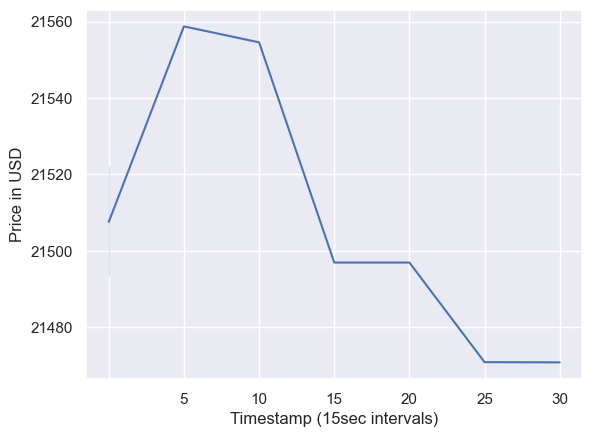

In [92]:
from matplotlib.pyplot import xlim


sns.set_theme(style='darkgrid')
sns.lineplot(data=df2, x='Timestamp', y='quote.USD.price')
plt.ticklabel_format(style='plain',axis='y',useOffset=False)
plt.xlabel('Timestamp (15sec intervals)')
plt.ylabel('Price in USD')
